### General algorithm for solving tridiagonal matrix



<IPython.core.display.Javascript object>


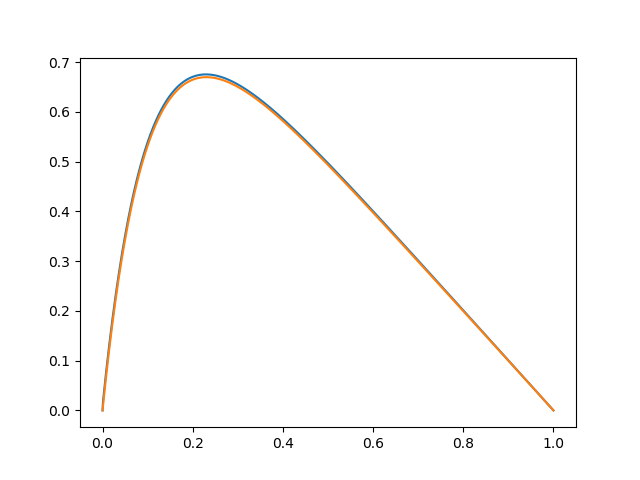

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
# Need to create 6 array to store tridiagonal values, u(x) 
# d_tilde and g_tilde

# The force term is assumed to be f(x) = 100exp(-10*x)
# f(x) = -u''(x)
def f(x):
    return 100*np.exp(-10*x)

x0 = 0; xN=1

n = 1000
h = (xN-x0)/n

x = np.linspace(x0,xN, n)

a = np.empty(n)
d = np.empty_like(a)
c = np.empty_like(a)
u_x = np.empty_like(a)
d_tilde = np.empty_like(a)
g_tilde = np.empty_like(a)
g = f(x)*h**2

a[0] = -1; c[0] = -1; d[0] = 2
d_tilde[0] = d[0]
u_x[0] = 0; u_x[-1] = 0

for i in range(1, n):
    a[i] = -1; c[i] = -1; d[i] = 2 #setting the diagonal values
    d_tilde[i] = d[i] - a[i-1]*c[i-1]/d_tilde[i-1]
    g_tilde[i] = g[i] - g_tilde[i-1]*a[i-1]/d_tilde[i-1]

i = n - 2
    
while i>0:
    u_x[i] = (g_tilde[i] -c[i]*u_x[i+1])/d_tilde[i]
    i -= 1


plt.plot(x, u_x)
plt.plot(x, 1-(1-np.exp(-10))*x - np.exp(-10*x))
    

### Specialized algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
def f(x):
    return 100*np.exp(-10*x)

x0 = 0; xN=1

n = 10000000
h = (xN-x0)/n

x = np.linspace(x0,xN, n)

a = np.empty(n)
d = np.empty_like(a)
c = np.empty_like(a)
u_x = np.empty_like(a)
d_tilde = np.zeros(n) + 2

g = f(x)*h**2
g_tilde = np.zeros(n) + g

a[0] = -1; c[0] = -1; d[0] = 2
d_tilde[0] = d[0]
u_x[0] = 0; u_x[-1] = 0

def forward(d_tilde, g_tilde):
    temp_var = 0
    for i in range(1, n):
    #     a[i] = -1; c[i] = -1; d[i] = 2 #setting the diagonal values
        temp_var = 1/d_tilde[i-1]
        d_tilde[i] -= temp_var
        g_tilde[i] += g_tilde[i-1]*temp_var
    return g_tilde, d_tilde

%prun g_tilde, d_tilde = forward(d_tilde, g_tilde)
        
# def backward(g_tilde, d_tilde):
#     i = n - 2
#     d_tilde = 1/d_tilde
#     while i>0:
#         u_x[i] = (g_tilde[i] + u_x[i+1])*d_tilde[i]
#         i -= 1
#     return u_x

# %prun u_x = backward(g_tilde, d_tilde)

In [2]:
def backward(g_tilde, d_tilde):
    i = n - 2
    d_tilde = 1/d_tilde
    while i>0:
        u_x[i] = (g_tilde[i] + u_x[i+1])*d_tilde[i]
        i -= 1
    return u_x

%prun u_x = backward(g_tilde, d_tilde)

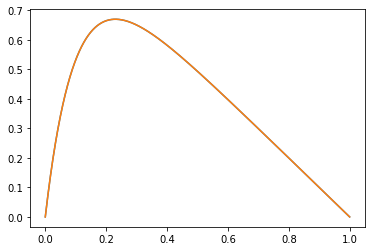

In [3]:
plt.plot(x, u_x)
plt.plot(x, 1-(1-np.exp(-10))*x - np.exp(-10*x))